In [22]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from itertools import combinations

In [4]:
iris = datasets.load_iris(as_frame=True)
df = iris.data
class_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['target'] = iris.target
df['species'] = df['target'].map(class_map)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa

## Задание 1

##### Корреляции между признаками на всей таблице.

In [5]:
df.drop(['target', 'species'], axis=1).corr()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000

**Вывод:** Большинство признаков сильно коррелируют между собой

##### Корреляции между признаками отдельно по классам.

In [6]:
df[df['target'] == 0].drop(['target', 'species'], axis=1).corr()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.742547           0.267176   
sepal width (cm)            0.742547          1.000000           0.177700   
petal length (cm)           0.267176          0.177700           1.000000   
petal width (cm)            0.278098          0.232752           0.331630   

                   petal width (cm)  
sepal length (cm)          0.278098  
sepal width (cm)           0.232752  
petal length (cm)          0.331630  
petal width (cm)           1.000000

In [7]:
df[df['target'] == 1].drop(['target', 'species'], axis=1).corr()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.525911           0.754049   
sepal width (cm)            0.525911          1.000000           0.560522   
petal length (cm)           0.754049          0.560522           1.000000   
petal width (cm)            0.546461          0.663999           0.786668   

                   petal width (cm)  
sepal length (cm)          0.546461  
sepal width (cm)           0.663999  
petal length (cm)          0.786668  
petal width (cm)           1.000000

In [8]:
df[df['target'] == 2].drop(['target', 'species'], axis=1).corr()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.457228           0.864225   
sepal width (cm)            0.457228          1.000000           0.401045   
petal length (cm)           0.864225          0.401045           1.000000   
petal width (cm)            0.281108          0.537728           0.322108   

                   petal width (cm)  
sepal length (cm)          0.281108  
sepal width (cm)           0.537728  
petal length (cm)          0.322108  
petal width (cm)           1.000000

**Вывод:** Матрицы ковариаций во многом отличаются, что может навредить линейному дискриминанту.

#### Визуализация распределения классов на всех парах переменных.

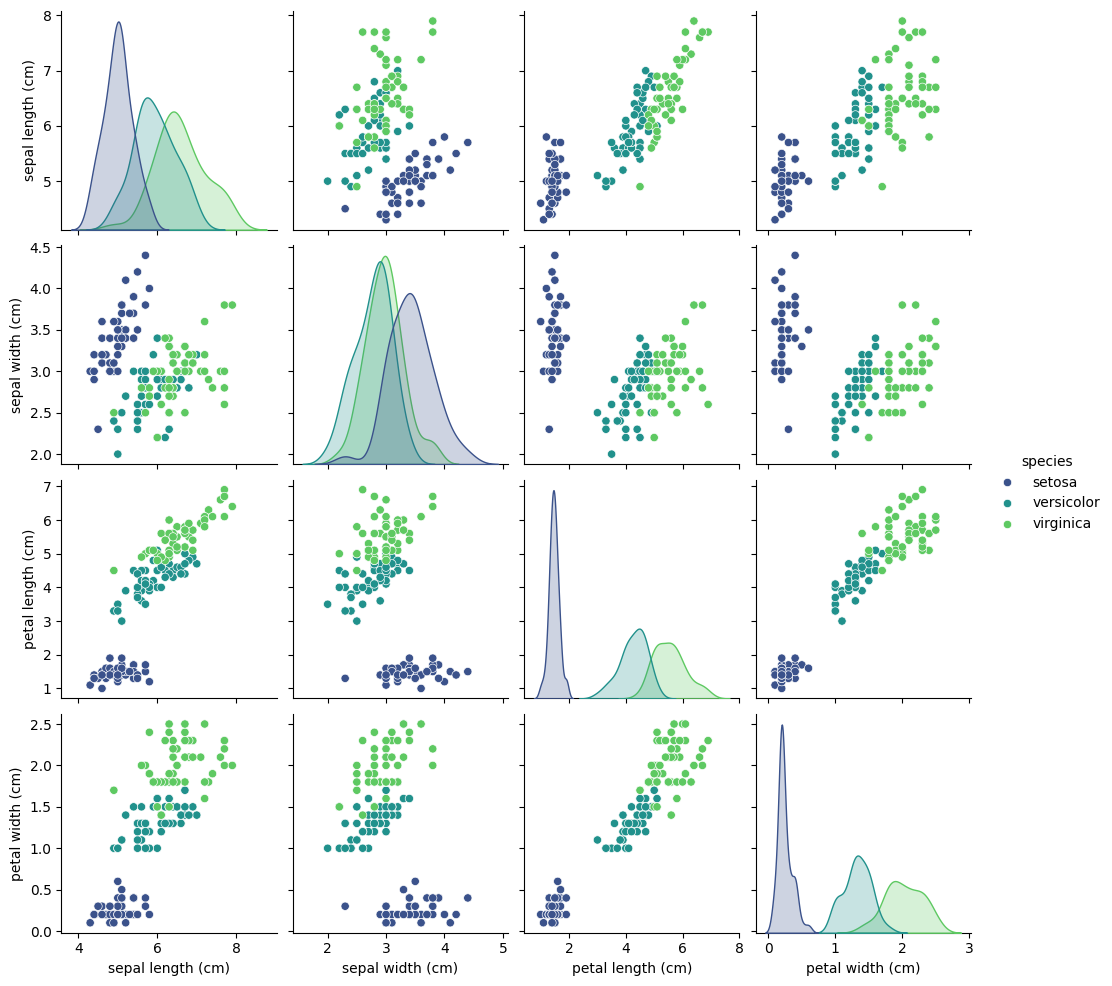

In [9]:
sns.pairplot(df.drop('target', axis=1), hue='species', palette='viridis')

**Вывод:** из графиков видно, что класс setosa практически во всех подпространствах признаков линейно отделим от других классов, следовательно, его всегда можно безошибочно классифицировать.

## Задание 2

In [10]:
# sepal width - petal length -- пример

In [11]:
df_new = df.drop(columns=['sepal length (cm)', 'petal width (cm)'])

In [12]:
df_new

sepal width (cm)  petal length (cm)  target    species
0                 3.5                1.4       0     setosa
1                 3.0                1.4       0     setosa
2                 3.2                1.3       0     setosa
3                 3.1                1.5       0     setosa
4                 3.6                1.4       0     setosa
..                ...                ...     ...        ...
145               3.0                5.2       2  virginica
146               2.5                5.0       2  virginica
147               3.0                5.2       2  virginica
148               3.4                5.4       2  virginica
149               3.0                5.1       2  virginica

[150 rows x 4 columns]

In [13]:
X = datasets.load_iris().data[:, 1:3]

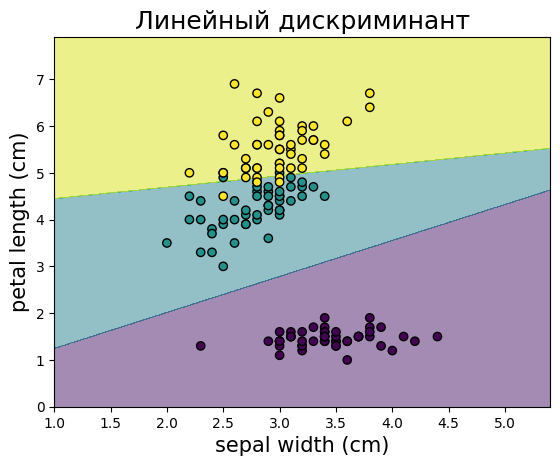

Accuracy =  0.9533333333333334
Balanced accuracy =  0.9533333333333333


In [14]:
clf = LinearDiscriminantAnalysis(solver='lsqr').fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('sepal width (cm)', fontsize=15)
plt.ylabel('petal length (cm)', fontsize=15)
plt.title('Линейный дискриминант', fontsize=18)
plt.show()
acc = accuracy_score(df_new.target, clf.predict(X))
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Accuracy = ', acc)
print('Balanced accuracy = ', balanced_acc)

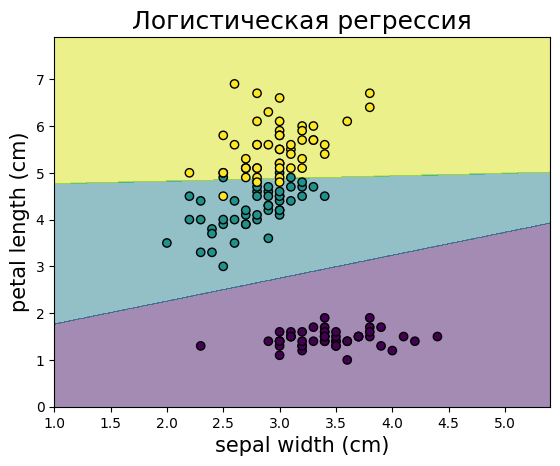

Balanced accuracy =  0.9533333333333333


In [15]:
clf = LogisticRegression().fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('sepal width (cm)', fontsize=15)
plt.ylabel('petal length (cm)', fontsize=15)
plt.title('Логистическая регрессия', fontsize=18)
plt.show()
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Balanced accuracy = ', balanced_acc)

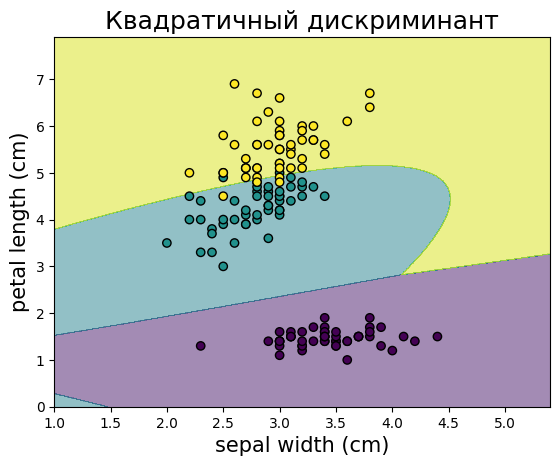

Balanced accuracy =  0.9533333333333333


In [16]:
clf = QuadraticDiscriminantAnalysis().fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('sepal width (cm)', fontsize=15)
plt.ylabel('petal length (cm)', fontsize=15)
plt.title('Квадратичный дискриминант', fontsize=18)
plt.show()
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Balanced accuracy = ', balanced_acc)

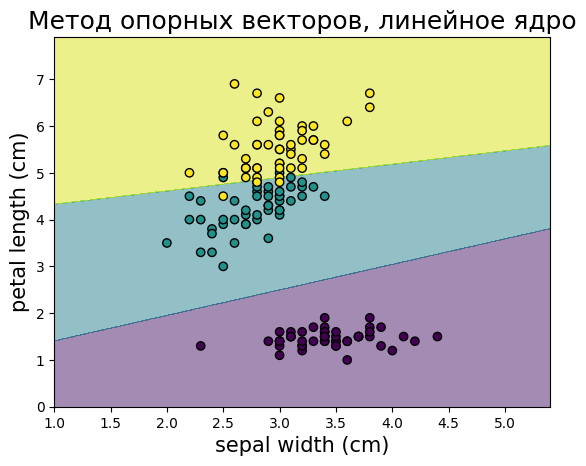

Balanced accuracy =  0.96


In [17]:
clf = SVC(kernel='linear').fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('sepal width (cm)', fontsize=15)
plt.ylabel('petal length (cm)', fontsize=15)
plt.title('Метод опорных векторов, линейное ядро', fontsize=18)
plt.show()
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Balanced accuracy = ', balanced_acc)

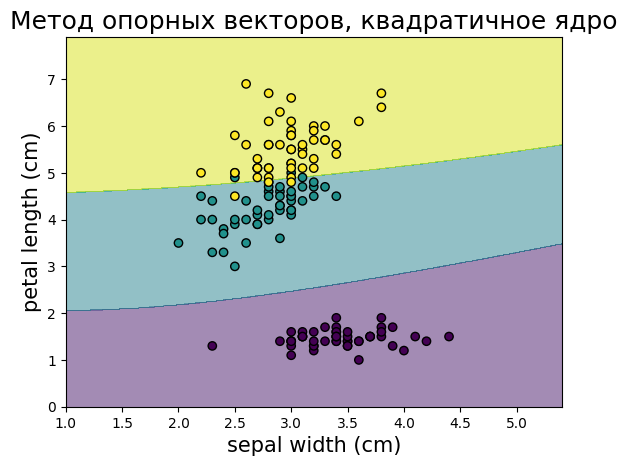

Balanced accuracy =  0.96


In [18]:
clf = SVC(kernel='poly', degree=2).fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('sepal width (cm)', fontsize=15)
plt.ylabel('petal length (cm)', fontsize=15)
plt.title('Метод опорных векторов, квадратичное ядро', fontsize=18)
plt.show()
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Balanced accuracy = ', balanced_acc)

**Вывод:** Все методы хорошо справляются с задачей. SVC показывает чуть большую точность, что в рамках задачи кажется неважным.

## Задание 3

In [19]:
train = df.loc[df['species'] != 'setosa'].reset_index(drop=True)
train

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 7.0               3.2                4.7               1.4   
1                 6.4               3.2                4.5               1.5   
2                 6.9               3.1                4.9               1.5   
3                 5.5               2.3                4.0               1.3   
4                 6.5               2.8                4.6               1.5   
..                ...               ...                ...               ...   
95                6.7               3.0                5.2               2.3   
96                6.3               2.5                5.0               1.9   
97                6.5               3.0                5.2               2.0   
98                6.2               3.4                5.4               2.3   
99                5.9               3.0                5.1               1.8   

    target     species  
0        1  versicolor  
1        1  versicolor  
2        1  versicolor  
3        1  versicolor  
4        1  versicolor  
..     ...         ...  
95       2   virginica  
96       2   virginica  
97       2   virginica  
98       2   virginica  
99       2   virginica  

[100 rows x 6 columns]

In [20]:
features = iris.feature_names
pairs = list(combinations(features, 2))

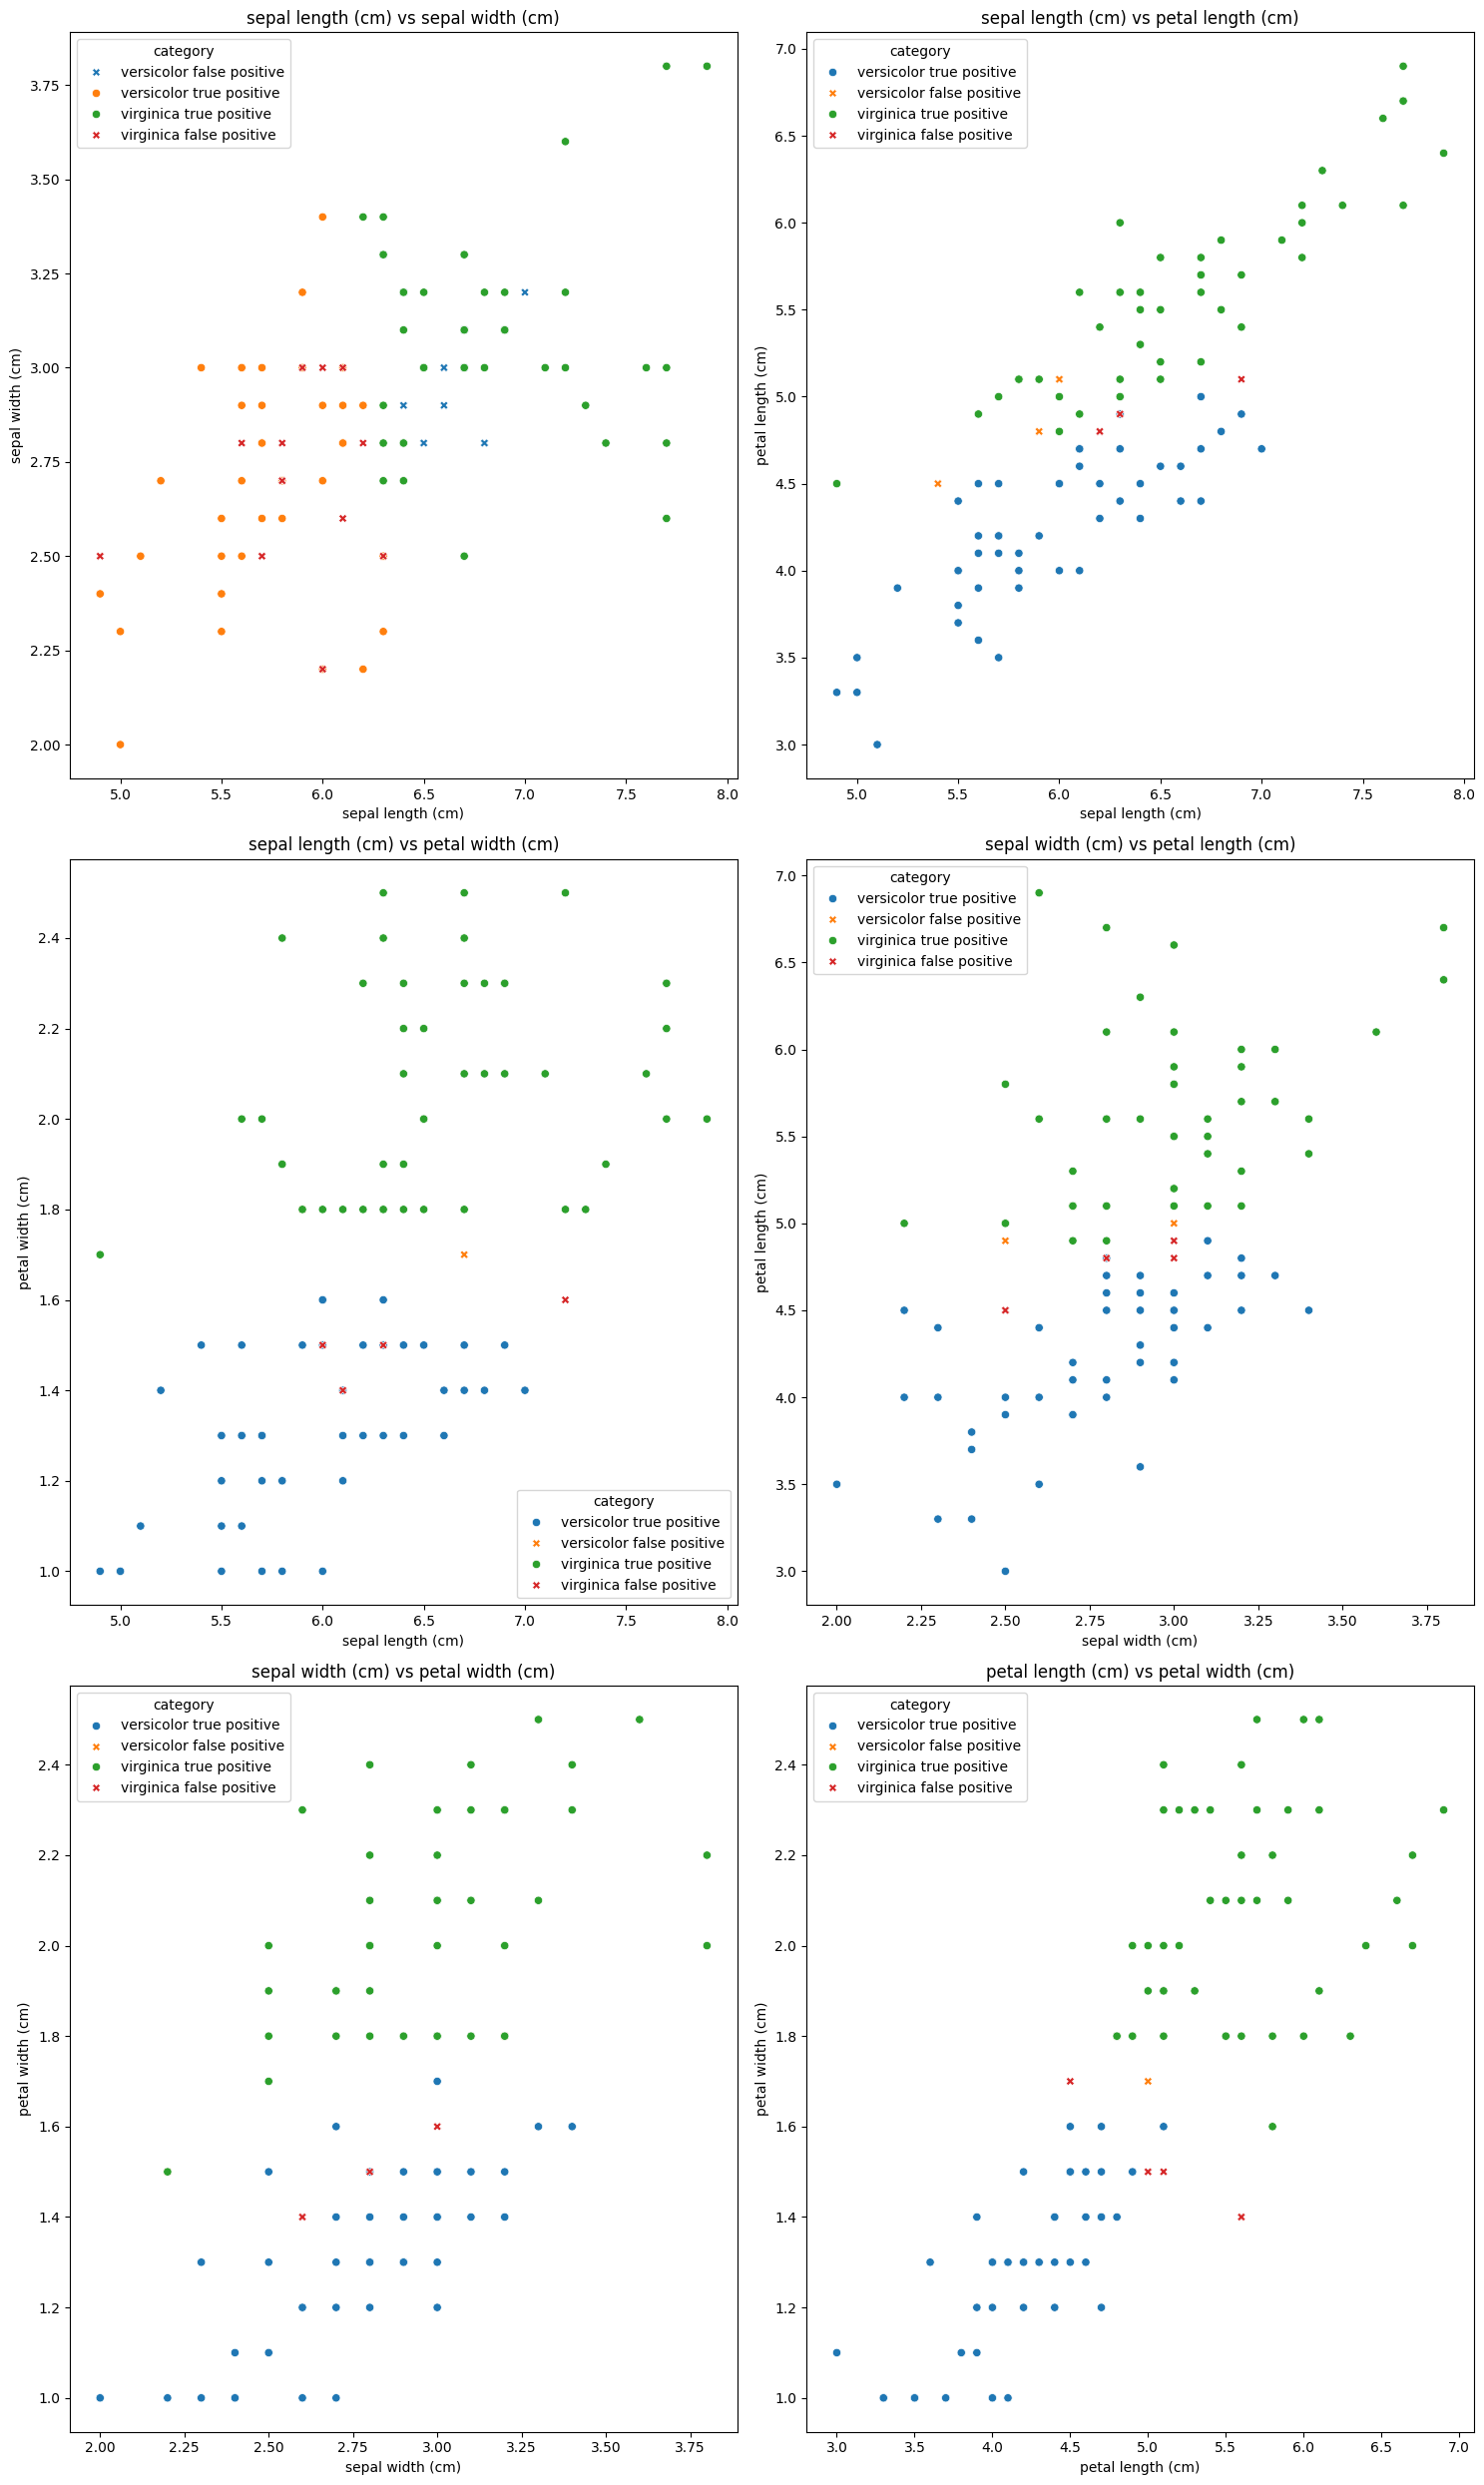

In [21]:
fig, axs = plt.subplots(3, 2, figsize=(15, 25))
axs = axs.flatten()

for i, (feat1, feat2) in enumerate(pairs):
    X = train[[feat1, feat2]]
    y = train['target']
    
    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)
    
    y_pred = lda.predict(X)
    
    # Создаем столбец для категории: class + true/false positive
    df_temp = X.copy()
    df_temp['true_class'] = train['species']
    df_temp['pred_target'] = y_pred
    df_temp['pred_class'] = df_temp['pred_target'].map(class_map)
    df_temp['correct'] = df_temp['true_class'] == df_temp['pred_class']
    df_temp['category'] = df_temp['true_class'] + ' ' + np.where(df_temp['correct'], 'true positive', 'false positive')
    
    # График
    sns.scatterplot(
        data=df_temp,
        x=feat1,
        y=feat2,
        hue='category',
        style='category',
        # palette={
        #     'versicolor true positive': 'green',
        #     'virginica true positive': 'blue',
        #     'versicolor false positive': 'red',
        #     'virginica false positive': 'red'
        # },
        markers={
            'versicolor true positive': 'o',
            'virginica true positive': 'o',
            'versicolor false positive': 'X',
            'virginica false positive': 'X'
        },
        ax=axs[i]
    )
    
    axs[i].set_title(f'{feat1} vs {feat2}')

plt.tight_layout()
plt.show()

**Вывод:** В первом подпрастрансве сразу бросается в глаза большое количество неверно классифицированных объектов. Так же теперь на графиках хорошо видна линейная зависимость таких переменных, как petal length и sepal length, а также petal length и petal width. Это логично, ведь у них очень большая корреляция (более 0.8)

## Задание 4

In [196]:
def Q_1(x, Sigma, mu):
    x = np.array(x)
    Sigma_inv = np.linalg.inv(Sigma)
    const = -0.5 * np.log(np.linalg.det(Sigma))
    quad_term = -0.5 * (x - mu).T @ Sigma_inv @ (x - mu)
    return const + quad_term


def Q_2(x, Lamda, nu):
    x = np.array(x)
    Lamda_inv = np.linalg.inv(Lamda)
    const = -0.5 * np.log(np.linalg.det(Lamda))
    quad_term = -0.5 * (x - nu).T @ Lamda_inv @ (x - nu)
    return const + quad_term


def l_0(df_X_1, df_X_2):    
    return df_X_1 - df_X_2

    
def plot_decision_curve_comparison(X, y, h=0.05):
    # Разделяем данные по классам
    X_1 = X[y==1]
    X_2 = X[y==2]
    
    Sigma = X_1.cov()
    Lamda = X_2.cov()
    mu = X_1.mean()
    nu = X_2.mean()

    # Создаем сетку
    x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
    y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Вычисляем L_0 для каждой точки сетки
    Z = np.zeros(xx.shape)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            point = np.array([xx[i, j], yy[i, j]])
            Z[i, j] = l_0(Q_1(point, Sigma, mu), Q_2(point, Lamda, nu))
    
    # Построение графика
    fig, axs = plt.subplots(1, 2, figsize=(12,6))
    axs = axs.flatten()
    
    # Области решения (где L_0 <> 0)
    axs[0].contourf(xx, yy, Z, levels=[0, Z.max()], colors=['lightblue'])
    axs[0].contourf(xx, yy, Z, levels=[Z.min(), 0], colors=['lightyellow'])
    axs[0].contour(xx, yy, Z, levels=[0])

    
    # Исходные данные
    scatter = axs[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k')
    
    axs[0].set_title('Ручной квадратичный дискриминант')
    axs[0].set_xlabel('sepal width (cm)')
    axs[0].set_ylabel('petal length (cm)')

    # Добавляем квадратичный дискриминант из sklearn
    clf = QuadraticDiscriminantAnalysis().fit(X, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict",
        alpha=0.5, grid_resolution=1000, ax=axs[1])
    disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor="k")
    axs[1].set_xlabel('sepal width (cm)')
    axs[1].set_ylabel('petal length (cm)')
    axs[1].set_title('Квадратичный дискриминант sklearn')
        
    plt.tight_layout()
    plt.show()

In [79]:
X = train[['sepal width (cm)', 'petal length (cm)']]
y = train.target

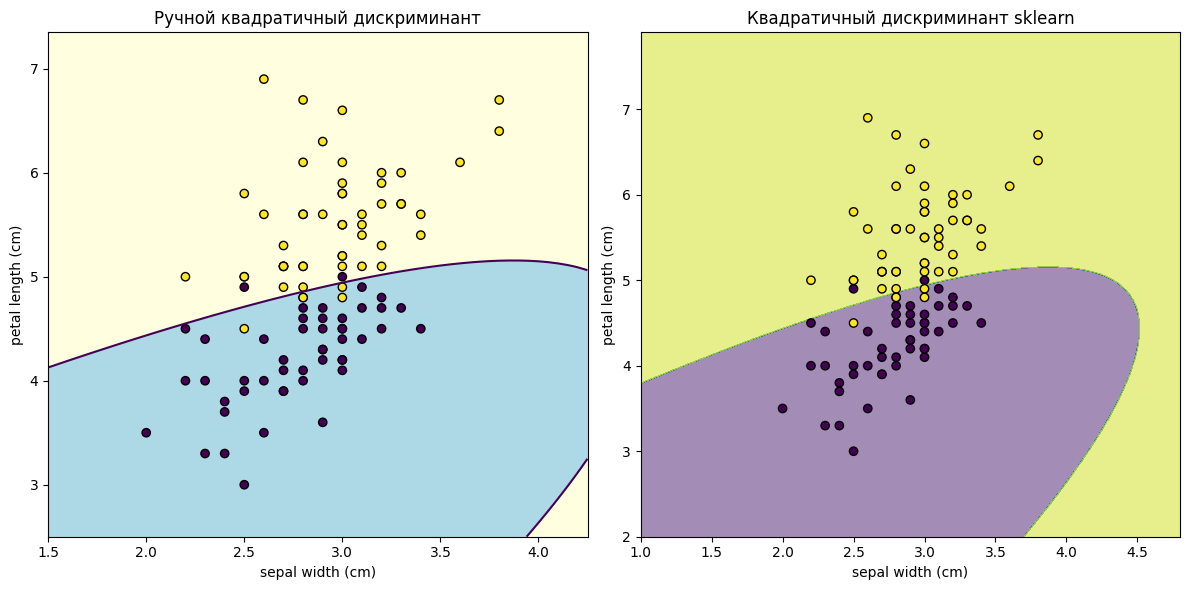

In [197]:
plot_decision_curve_comparison(X, y)


**Вывод:** Ручной дискриминант показал себя так же хорошо на данном датасете. Однако он получился заметно медленнее.